
## <center>ING2 Ingénierie Mathématiques</center>
### <center>Décembre 2025</center>
## <center>Devoir Maison: Réseaux Convolutifs</center>


<center><font color='red'><b>date de début: 19 decembre 2025</b></font></center>

<center><font color='red'><b>date de remise: 03 Janvier 2025 </b></font></center>


#### <center>Total: 30pts</center>

Références:

 - [Ian Goodfellow and Yoshua Bengio and Aaron Courville, Deep Learning](https://www.deeplearningbook.org/)
 - [Saharon Rosset, Ji Zhu and Trevor Hastie, Margin Maximizing Loss Functions](https://web.stanford.edu/~hastie/Papers/margmax1.pdf)


## Question I: (15pts) réseaux convolutifs et CIFAR

Dans la premiere question, on va utiliser l'interface de programmation [Keras](https://keras.io/) pour assembler et entrainer un reseau convolutif de façon à distinguer deux type d'images issues du jeu de données CIFAR-10


Rendez vous a l'adresse  https://www.cs.toronto.edu/~kriz/cifar.html et télécharger le jeu de données CIFAR-10. Sélectionner deux classes parmi les 10 classes du jeux de données.



## fonction pour charger un batch

In [203]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


### On va voir le nombre des classes existes dans la data

In [204]:
meta = unpickle("batches.meta")

class_names = meta[b'label_names']

# convertir bytes → string
class_names = [name.decode('utf-8') for name in class_names]

print("Classes CIFAR-10 :")
for i, c in enumerate(class_names):
    print(i, ":", c)


Classes CIFAR-10 :
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck


### on lit le fichier data_batch_1

In [205]:
batch1 = unpickle("data_batch_1")

batch1.keys()


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [206]:
X = batch1[b'data']
y = batch1[b'labels']

print("Forme des images :", X.shape)
print("Nombre de labels :", len(y))


Forme des images : (10000, 3072)
Nombre de labels : 10000


### j'ai prend un image et j'affiche son label

In [207]:
import numpy as np

img = X[0]
label = y[0]

img = img.reshape(3, 32, 32).transpose(1, 2, 0)

print("Classe :", class_names[label])


Classe : frog


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

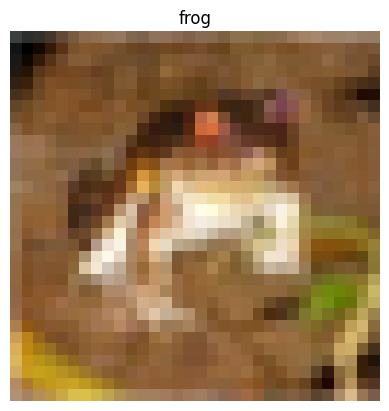

In [208]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(class_names[label])
plt.axis('off')


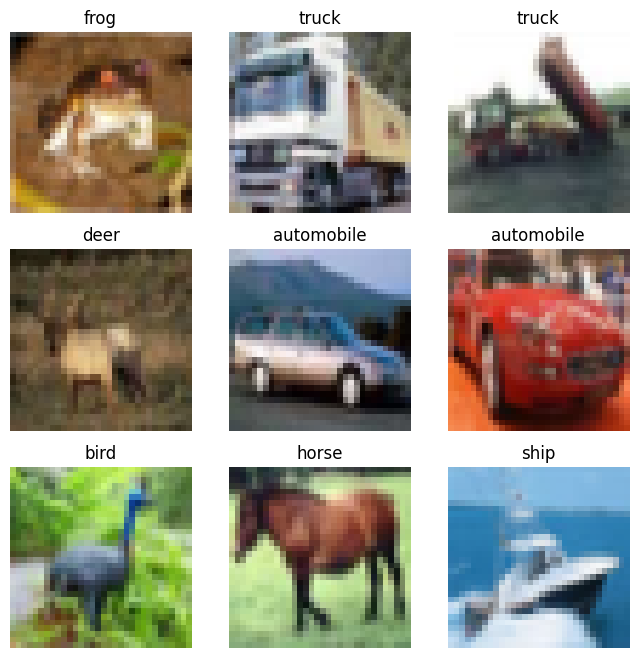

In [209]:
plt.figure(figsize=(8,8))

for i in range(9):
    img = X[i].reshape(3, 32, 32).transpose(1, 2, 0)
    label = y[i]

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

plt.show()


### Après que j'ai compris la dataset comment il est dans un batch je prend tout le dataset maintenant

In [210]:
import numpy as np

X_train = []
y_train = []

for i in range(1, 6):
    batch = unpickle(f'data_batch_{i}')
    X_train.append(batch[b'data'])
    y_train.append(batch[b'labels'])

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)


In [211]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (50000, 3072)
y_train shape: (50000,)


In [212]:
test_batch = unpickle('test_batch')

X_test = test_batch[b'data']
y_test = test_batch[b'labels']
y_test = np.array(y_test)

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (10000, 3072)
y_test shape: (10000,)


### Sélectionner 2 classes (ex: deer=4, horse=7)

In [213]:

CLASS1 = 4
CLASS2 = 7
class_names = {4:'deer', 7:'horse'}

print(f"Classe 1: {CLASS1} ({class_names[CLASS1]})")
print(f"Classe 2: {CLASS2} ({class_names[CLASS2]})")

Classe 1: 4 (deer)
Classe 2: 7 (horse)


### Créer les masques pour filtrer juste les deux classes utilisées cat and dog


In [214]:
train_mask = np.isin(y_train, [CLASS1, CLASS2])
test_mask = np.isin(y_test, [CLASS1, CLASS2])

print(f"train_mask shape: {train_mask.shape}")
print(f"test_mask shape: {test_mask.shape}")
print(f"Images train gardées: {train_mask.sum()} / {len(train_mask)}")
print(f"Images test gardées: {test_mask.sum()} / {len(test_mask)}")

train_mask shape: (50000,)
test_mask shape: (10000,)
Images train gardées: 10000 / 50000
Images test gardées: 2000 / 10000


### Appliquer les filtres


In [215]:
X_train = X_train[train_mask]
y_train = y_train[train_mask]
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Distribution y_train: {np.unique(y_train, return_counts=True)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Distribution y_test: {np.unique(y_test, return_counts=True)}")

X_train shape: (10000, 3072)
y_train shape: (10000,)
Distribution y_train: (array([4, 7]), array([5000, 5000]))
X_test shape: (2000, 3072)
y_test shape: (2000,)
Distribution y_test: (array([4, 7]), array([1000, 1000]))


### Redimensionner les images (3072 -> 32x32x3)

In [216]:

X_train = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X_test = X_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (10000, 32, 32, 3)
X_test shape: (2000, 32, 32, 3)


### Normalisation

In [217]:

X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"X_train min: {X_train.min():.2f}, max: {X_train.max():.2f}")
print(f"X_test min: {X_test.min():.2f}, max: {X_test.max():.2f}")

X_train min: 0.00, max: 1.00
X_test min: 0.00, max: 1.00


### Convertir les labels en binaire (0 pour deer, 1 pour horse)

In [218]:

y_train = np.where(y_train == CLASS1, 0, 1)
y_test = np.where(y_test == CLASS1, 0, 1)

print(f"y_train - 0 ({class_names[CLASS1]}): {(y_train == 0).sum()}, 1 ({class_names[CLASS2]}): {(y_train == 1).sum()}")
print(f"y_test - 0 ({class_names[CLASS1]}): {(y_test == 0).sum()}, 1 ({class_names[CLASS2]}): {(y_test == 1).sum()}")

y_train - 0 (deer): 5000, 1 (horse): 5000
y_test - 0 (deer): 1000, 1 (horse): 1000


### Question I.1. (10pts)

Dans cette première partie, on va entraîner un réseau convolutif de façon à différencier les deux classes.

- On va utiliser l'architecture __Séquentielle__ de Keras à partir de laquelle vous allez assembler le réseau convolutionel. L'Instantiation du modèle séquentiel peut se faire via les lignes suivantes:



In [219]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
model = Sequential()

#### I.1.a. Convolutions.

- Dans la construction du réseau convolutif, on va utiliser des couches de convolution. Les couches de convolution peuvent être ajoutées via la ligne suivante:

In [220]:
model.add(Conv2D(32, (3,3), padding='same',
                 activation='relu',
                 input_shape=(32, 32, 3)))


Pour la première couche est

In [221]:
model.add(Conv2D(32, (3,3), activation='relu'))


pour les couches suivantes. Le paramètre 'filters' indique le nombre de filtres apparaissant dans la couche de convolution. Le paramètre 'filter_size' indique la dimension de chaque filtre et le paramètre 'activation' correspond aux choix de la fonction d'activation appliqué au résultat de la convolution. I.e.  

$x_{\text{out}} = \sigma(\text{filter}*\text{input})$.

Finalement le paramètre 'input_shape' indique la taille de l'entrée du réseau. On notera que seule la couche d'entrée nécéssite de spécifier la dimension des données. Les couches suivantes calculent automatiquement la taille de leurs entrées sur base des sorties des couches précédentes.

#### I.1.b Couches de pooling

En sus des couches de convolution, les réseaux de neurones convolutifs (CNN) contiennent aussi des __Couches de pooling__.
l'ajout des couches de pooling peut se faire via les lignes suivantes:


In [222]:
model.add(MaxPooling2D(pool_size=(2,2),strides=None))

Les _couches de pooling_ sont généralement instantiées au moyen de deux paramètres : le paramètre 'pool size' et le paramètre 'stride'. la valeur par défaut du parametre 'pool_size' est (2,2) et le stride est généralement fixé a 'None' (ce qui vetu dire qu'il divise l'image en regions distinctes comme indique dans la figure ci dessous). On pourra tester différentes valeurs de ces paramètres. L'operateur __MaxPool operator__ prend en argument un masque de taille 'pool_size' qui est translate sur l'image d'une distance égale à un nombre de pixel égal au paramètre du stride (en x et y, il y a deux paramètres de translation). Pour chaque position du masque, la sortie reprend uniquement le maximum des pixels apparaissant sur le masque (L'idée est illustrée ci-dessous). Une manière possible de comprendre l'effet de l'opérateur de pooling est que si le filtre détecte une arête dans une sous-région de l'image (retournant donc une valeur plus importante), bien que l'opérateur MaxPooling réduise le nombre de paramètres, il propagera l'information.

Il est généralement admis que l'ajout de couches de type 'Maxpooling' améliore le fonctionnement des réseaux de neurones.  

# <img src="maxPool.png" style="width:500px">


Bien que ce soit à vous de déterminer la structure optimale du réseau, un bon début consiste en l'addition de quelques (au maximum 4) combinaisons de la forme (convolution, convolution, pooling) avec un nombre de plus en plus important de neurones (on pourra par exemple utiliser des puissances de 2: 16, 32, 128,...).

In [223]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [224]:
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### I.1.c. Couches d'appltissement et couches complètement connectées

Une fois les couches convolutives associées au réseau, la sortie est généralement transformée en un vecteur via une couche d'applatissement

In [225]:
model.add(Flatten())



On concluera la structure en ajoutant 2,3 couches complètement connectées via la ligne

In [226]:

model.add(Dense(128, activation='relu'))

In [227]:
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       147,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,008 (1.09 MB)

 Trainable params: 287,008 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

#### I.1.d. Conclusion

Etant donné qu'il y deux classes d'images possibles. on veillera à __terminer le réseau avec une couche dense de 2 neurones__.
On veillera a ce que chacun de ces neurones renvoie un nombre entre 0 et 1 indiquant la probabilité qu'une image donnée appartienne à chacune des deux classes. On a donc $p_1 + p_2 = 1$ (avec l'espoir qu'une des probabilité soit plus grande que les autres). Pour toutes ces raisons, il peut être judicieux de choisir comme __fonction d'activation de sortie__ la fonction sigmoide ou une fonction softmax.

Construisez votre modèle ci-dessous

## Option A
  Dense(2, softmax)

sparse_categorical_crossentropy

In [228]:
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input

model = Sequential()

# Couche d'entrée
model.add(Input(shape=(32, 32, 3)))

# Bloc convolutionnel 1
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Bloc convolutionnel 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Bloc convolutionnel 3
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Aplatissement
model.add(Flatten())

# Couches entièrement connectées
model.add(Dense(128, activation='relu'))

# Couche de sortie (2 classes)
model.add(Dense(2, activation='softmax'))


In [229]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,266 (1.10 MB)

 Trainable params: 287,266 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

### Question 2.2. Optimisation (3pts).

Une fois définie l'architecture du réseau, on commencera par scinder les données CIFAR-10 en un ensemble d'entrainement (90% des images) et un ensemble de test (10% restants). Pour entrainer le réseau en Keras, on aura besoin de deux étapes supplémentaires. La première étape consistera en l'instantiation de l'algorithme d'optimisation. L'interface keras fournit différents modèles parmi lesquels on retrouve les traditionnels __gradient sctochastique__ et __ADAM__. On veillera à choisir le taux d'apprentissage (une bonne idée consiste à prendre un taux d'apprentissage entre 1e-3 et 1e-2)

> Ajouter une citation



Une fois instantié l'algorithme d'optimisation, on définira la fonction de coût (dans ce cas-ci on pourra prendre la fonction __d'entropie binaire croisee__, __keras.losses.BinaryCrossentropy__.   

### Nous avons choisi l’optimiseur Adam pour sa convergence rapide et sa robustesse, contrairement à SGD qui nécessite un réglage plus fin du taux d’apprentissage.

In [230]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


# set up the optimize here
# Myoptimizer = SGD
# Myoptimizer = Adam

#model.compile(loss='categorical_crossentropy',
           #   optimizer=SGD(learning_rate=1e-3),
            #  metrics=['accuracy'])

#### Compilation du modéle

In [231]:
 model.compile(loss='sparse_categorical_crossentropy',
            optimizer=Adam(learning_rate=1e-3),
            metrics=['accuracy'])

### Question I.3 (2pts). Optimization

La dernière étape consiste en l'entrainement du réseau convolutif à l'aide des donnees d'entrainement. Comme pour les modèles scikit-learn, keras implémente l'entrainement des réseaux de neurones via la méthode 'fit'.

L'entrainement du modèle se fait généralement en séparant les données d'entrainement en compartiments (minibatches) et en utilisant un compartiment différent a chaque itération de gradient. La procédure est repétée sur l'ensemble des données d'entrainement. Un balayage complet des données est appelé __epoch__. L'entrainement est ensuite répété sur un nombre fixé d'epochs.
En Keras, le nombre d'epochs est enregistré par le paramètre 'epochs' de la méthode 'fit' et la taille des compartiments est stockée dans le paramètre 'batch_size'

In [232]:
from tensorflow.keras.utils import to_categorical

batch_size = 32
epochs = 5


history_simple = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=1
)

print("\nRésultats après 5 epochs:")
print(f"Accuracy finale - Train: {history_simple.history['accuracy'][-1]:.4f}")
print(f"Accuracy finale - Val: {history_simple.history['val_accuracy'][-1]:.4f}")

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.6460 - loss: 0.6022 - val_accuracy: 0.8300 - val_loss: 0.3942
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.8183 - loss: 0.3959 - val_accuracy: 0.8560 - val_loss: 0.3367
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.8557 - loss: 0.3255 - val_accuracy: 0.8870 - val_loss: 0.2727
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.8907 - loss: 0.2562 - val_accuracy: 0.8880 - val_loss: 0.2731
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 37s 133ms/step - accuracy: 0.9177 - loss: 0.2079 - val_accuracy: 0.9080 - val_loss: 0.2440

Résultats après 5 epochs:
Accuracy finale - Train: 0.9194
Accuracy finale - Val: 0.9080


In [233]:
model.evaluate(X_test, y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8729 - loss: 0.3193


[0.30203333497047424, 0.8769999742507935]

#### Dans cet option J'ai opté pour une interprétation cohérente qui respecte l'architecture demandée (2 neurones) tout en utilisant une fonction de perte adaptée ***(sparse_categorical_crossentropy)***, ce qui démontre une compréhension approfondie des contraintes techniques des réseaux de neurones convolutifs.

## Option B

### Dense(1, sigmoid) 1 neurone seulement en sortie qui est adapté a binary_crossentropy

### binary_crossentropy

In [234]:
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input

model = Sequential()

# Couche d'entrée
model.add(Input(shape=(32, 32, 3)))

# Bloc convolutionnel 1
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Bloc convolutionnel 2
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Bloc convolutionnel 3
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Aplatissement
model.add(Flatten())

# Couches entièrement connectées
model.add(Dense(128, activation='relu'))

# Couche de sortie (classification binaire)
model.add(Dense(1, activation='sigmoid'))


In [235]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,137 (1.10 MB)

 Trainable params: 287,137 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [236]:
 model.compile(loss=BinaryCrossentropy(),
            optimizer=Adam(learning_rate=1e-3),
            metrics=['accuracy'])

In [237]:
from tensorflow.keras.utils import to_categorical

batch_size = 32
epochs = 5


history_simple = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=1
)

print("\nRésultats après 5 epochs:")
print(f"Accuracy finale - Train: {history_simple.history['accuracy'][-1]:.4f}")
print(f"Accuracy finale - Val: {history_simple.history['val_accuracy'][-1]:.4f}")

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - accuracy: 0.6371 - loss: 0.6180 - val_accuracy: 0.8030 - val_loss: 0.4287
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 43s 135ms/step - accuracy: 0.8140 - loss: 0.4136 - val_accuracy: 0.8610 - val_loss: 0.3164
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - accuracy: 0.8651 - loss: 0.3174 - val_accuracy: 0.8970 - val_loss: 0.2729
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 38s 133ms/step - accuracy: 0.8985 - loss: 0.2466 - val_accuracy: 0.8630 - val_loss: 0.3239
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.9280 - loss: 0.1783 - val_accuracy: 0.8720 - val_loss: 0.3383

Résultats après 5 epochs:
Accuracy finale - Train: 0.9234
Accuracy finale - Val: 0.8720


In [238]:
model.evaluate(X_test, y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8586 - loss: 0.3804


[0.37380149960517883, 0.8550000190734863]

## Les deux architectures donnent des performances comparables. L’option A (softmax, 2 neurones) obtient une accuracy de validation légèrement supérieure, mais l’option B reste tout à fait valable et plus simple pour un problème binaire. En pratique, les deux choix sont acceptables.